In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


### EDA

#### 1. 데이터 타입 확인

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [5]:
train_df.shape

(55423856, 8)

#### 2. 통계값 활용

In [4]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


#### 3. 결측치 확인

In [7]:
train_df.isnull()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
55423851,False,False,False,False,False,False,False,False
55423852,False,False,False,False,False,False,False,False
55423853,False,False,False,False,False,False,False,False
55423854,False,False,False,False,False,False,False,False


In [8]:
train_df.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

-> 결측치(376개)는 전체 데이터(55,423,856개)의 약 0.0007%로 삭제

In [11]:
train_df.dropna(inplace=True)

In [12]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
train_df.shape

(55423480, 8)

-> 55,423,856개 -> 55,423,480개 (376개 삭제)

#### 4. 중복된 데이터

In [10]:
train_df.duplicated().sum()

0

#### 5. 이상치 확인

<AxesSubplot:>

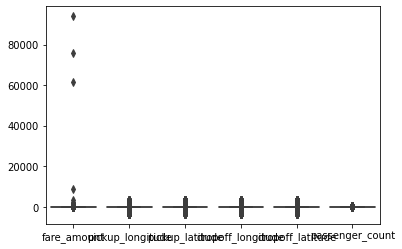

In [3]:
sns.boxplot(data=train_df)

1) fare_amount

<AxesSubplot:>

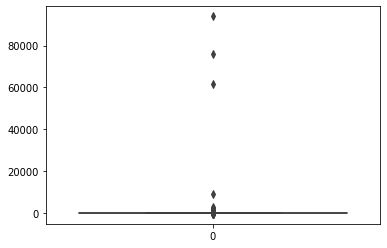

In [4]:
sns.boxplot(data=train_df['fare_amount'])

> LA 택시 기본요금 : $2.85
- 이후 추가 요금 : 1/9 마일당 30센트(1마일 당 $2.70)


> 뉴욕 택시 기본요금 : $2.5
- 이후 추가 요금 : 1마일에 $2.5 추가, 정차 1분 경과시 $0.5 추가


> 러시아워 요금 : 평일 오후 4시~8시까지 기본 요금이 $1 추가된 $3.5


> 팁은 기본적으로 금액의 10~20%

https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020201&docId=345570482&qb=66+46rWtIO2DneyLnCDquLDrs7jsmpTquIg=&enc=utf8&section=kin.ext&rank=1&search_sort=0&spq=0

In [27]:
# 택시 요금 0달러 이하인 데이터

(train_df['fare_amount'] <= 0).sum()

3834

-> 논리적으로 존재할 수 없는 값이므로 삭제

In [28]:
fareUnder0 = train_df[train_df['fare_amount'] <= 0].index

train_df.drop(fareUnder0, inplace=True)

In [29]:
train_df.shape

(55419577, 8)

-> 55,423,411개 -> 55,419,577개 (3,834개 삭제)

In [31]:
# 4분위수, IQR 계산

q1 = train_df['fare_amount'].quantile(0.25)
q2 = train_df['fare_amount'].quantile(0.5)
q3 = train_df['fare_amount'].quantile(0.75)

iqr = q3 - q1
iqr

6.5

In [32]:
# outlier cutoff, lower/upper bound 계산

cut_off = iqr * 1.5

lower = q1 - cut_off
upper = q3 + cut_off

print(lower)
print(upper)

-3.75
22.25


In [33]:
# 1사분위와 4사분위에 속해있는 데이터 각각 저장    

data1 = train_df[train_df['fare_amount'] > upper]
data2 = train_df[train_df['fare_amount'] < lower]

In [34]:
# 이상치 개수

data1.shape[0] + data2.shape[0]

4773250

-> 이상치(4,773,250개)는 전체 데이터(55,419,577개)의 약 8.613%로 다른 통계값으로 대체

In [38]:
data1.index

Int64Index([      31,       32,       35,       54,       56,       77,
                 105,      112,      118,      132,
            ...
            55423720, 55423726, 55423750, 55423755, 55423775, 55423795,
            55423824, 55423828, 55423835, 55423854],
           dtype='int64', length=4773250)

In [37]:
print(train_df['fare_amount'].mean())
print(train_df['fare_amount'].median())

11.346242184598474
8.5


-> 평균(약 11.3 달러) 과 중앙값(8.5 달러) 중 어떤 값으로 대체??

2) pickup_datetime

In [ ]:
# object 타입

3) pickup_longitude

<AxesSubplot:>

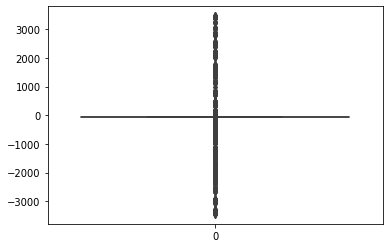

In [17]:
sns.boxplot(data=train_df['pickup_longitude'])

4) pickup_latitude

<AxesSubplot:>

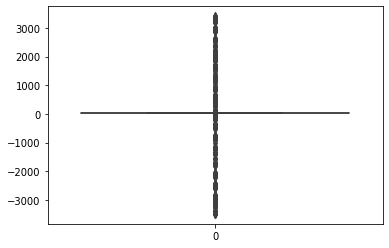

In [15]:
sns.boxplot(data=train_df['pickup_latitude'])

5) dropoff_longitude

6) dropoff_latitude

7) passenger_count  

<AxesSubplot:>

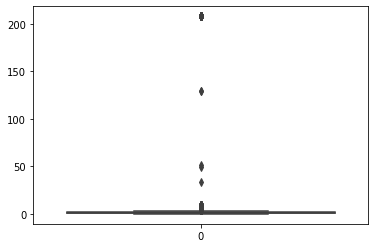

In [5]:
sns.boxplot(data=train_df['passenger_count'])

In [16]:
(train_df['passenger_count'] > 10).sum()

69

-> 승객 수 10명 초과인 데이터(69개)를 이상치로 처리; 전체 데이터(55,423,480개)의 약 0.0001%로 삭제

In [18]:
passengerOver10 = train_df[train_df['passenger_count'] > 10].index

train_df.drop(passengerOver10, inplace=True)

In [19]:
(train_df['passenger_count'] > 10).sum()

0

In [20]:
train_df.shape

(55423411, 8)

-> 55,423,480개 -> 55,423,411개 (69개 삭제)

--------------------------------------------------------

#### 6. 속성 간의 관계

* pickup_longitude와 pickup_latitude / dropoff_longitude와 dropoff_latitude -> (위도,경도) 좌표 -> 거리 계산
* pickup_datetime -> 교통 혼잡도 예측 (ex. 출퇴근 시간)
* passenger_count -> 1인당 택시비(?)

In [6]:
train_df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.004133,-0.003120,0.004493,-0.003426,0.006131
pickup_longitude,0.004133,1.000000,-0.489448,0.728499,-0.476756,0.000787
pickup_latitude,-0.003120,-0.489448,1.000000,-0.458834,0.523991,-0.001732
dropoff_longitude,0.004493,0.728499,-0.458834,1.000000,-0.505088,0.001164
dropoff_latitude,-0.003426,-0.476756,0.523991,-0.505088,1.000000,-0.001807
passenger_count,0.006131,0.000787,-0.001732,0.001164,-0.001807,1.000000


<AxesSubplot:>

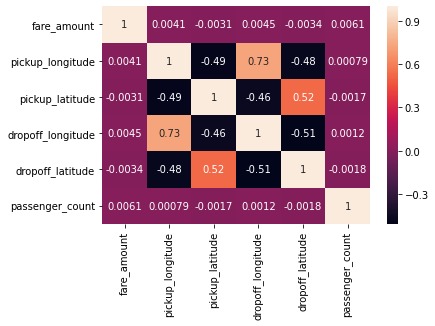

In [3]:
sns.heatmap(train_df.corr(), annot=True)

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

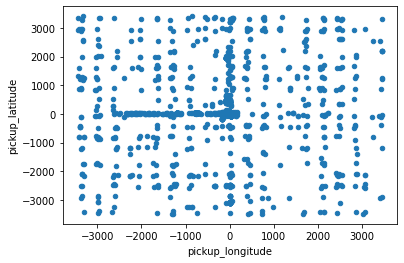

In [7]:
train_df.plot(x='pickup_longitude', y='pickup_latitude', kind='scatter')

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

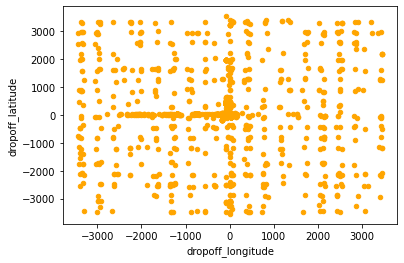

In [8]:
train_df.plot(x='dropoff_longitude', y='dropoff_latitude', kind='scatter', color='orange')

=======================================================================================================================

### 전처리

#### 1. 파생변수 - 날짜데이터 자르기 -> 날짜 + 시간 변수로 나누기

pickup_datetime : 2009-06-15 17:26:21 UTC

In [ ]:
datetime = train_df['pickup_datetime'].str.split(pat='', n=3, expand=True)
datetime

In [7]:
datetime = pd.DataFrame(datetime)

,pickup_datetime
0,"[2009-06-15, 17:26:21, UTC]"
1,"[2010-01-05, 16:52:16, UTC]"
2,"[2011-08-18, 00:35:00, UTC]"
3,"[2012-04-21, 04:30:42, UTC]"
4,"[2010-03-09, 07:51:00, UTC]"
...,...
55423851,"[2014-03-15, 03:28:00, UTC]"
55423852,"[2009-03-24, 20:46:20, UTC]"
55423853,"[2011-04-02, 22:04:24, UTC]"
55423854,"[2011-10-26, 05:57:51, UTC]"


#### 2. 추가변수 - 거리 계산

In [8]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [9]:
from haversine import haversine

In [ ]:
'''
lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)

haversine(lyon, paris)
>> 392.2172595594006  # in kilometers

haversine(lyon, paris, unit='mi')
>> 243.71201856934454  # in miles

haversine(lyon, paris, unit='nmi')
>> 211.78037755311516  # in nautical miles
'''

https://gaussian37.github.io/python-etc-%EC%9C%84%EB%8F%84,%EA%B2%BD%EB%8F%84-%EA%B0%84-%EA%B1%B0%EB%A6%AC/

====================================================================================

In [11]:
sample=train_df.sample(n=5000)

In [12]:
pickup = sample[['pickup_longitude','pickup_latitude']]
pd.DataFrame(pickup)
pickup.head()

,pickup_longitude,pickup_latitude
28864017,-73.978945,40.777317
46447492,-73.993408,40.751968
25498343,-73.952355,40.786502
3049179,-73.982923,40.781832
7686625,-73.971315,40.750957


In [13]:
dropoff = sample[['dropoff_longitude','dropoff_latitude']]
pd.DataFrame(dropoff)
dropoff.head()

,dropoff_longitude,dropoff_latitude
28864017,-73.993695,40.746755
46447492,-73.978302,40.752567
25498343,-73.967817,40.800362
3049179,-73.971343,40.795105
7686625,-73.987985,40.734582


In [14]:
distance = []

In [15]:
! pip install geopy


You should consider upgrading via the 'c:\users\jooya\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [16]:
from geopy.distance import distance

In [17]:
dist = []
for i in range(len(dropoff.index)):
    result = distance(pickup.values[i], dropoff.values[i]).m
    dist.append(result)
print(dist)

[1896.4115351348714, 1686.075344419448, 1777.8762328892185, 1355.623156733049, 1927.7282757323214, 1325.795765545255, 1886.9278468201785, 1280.8799377825817, 4067.625887123399, 595.3495084829351, 3134.4151527130866, 452.47863104761694, 530.8135838010161, 1227.7679977929802, 12695.643201625708, 1167.1720602744151, 3717.1684536552657, 2609.666068197585, 2378.1818998779027, 364.05179603665005, 2026.7635961504097, 1863.7034322814181, 0.0, 7427.43772548147, 0.0, 1962.9323197207973, 300.32110238637387, 2715.6794648782634, 1298.1556979910138, 2158.371935409761, 3238.777430221083, 212.32803110445047, 1373.8012723196168, 1153.339914748058, 736.8157879234411, 1118.8979817105912, 1817.6563944108727, 3635.625059357136, 2824.6614310469495, 417.64859114272286, 1702.0891926857082, 576.9586221257287, 2186.260523812924, 2496.207202811026, 1327.2926329464347, 1362.932632937577, 362.9830926069533, 369.3632153435537, 327.3652880677983, 13390.056046149997, 1032.476336134277, 808.1264642531027, 260.29238713

In [18]:
dist = pd.DataFrame(dist)
dist.head()

,0
0,1896.411535
1,1686.075344
2,1777.876233
3,1355.623157
4,1927.728276


<AxesSubplot:>

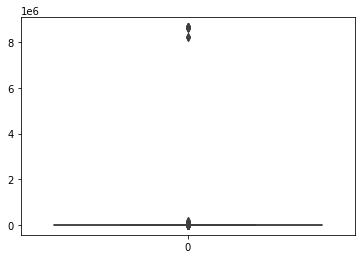

In [20]:
sns.boxplot(data=dist)